In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
from glob import glob

In [2]:
female = glob('./data/crop/female_crop/*.png')
male = glob('./data/crop/male_crop/*.png')

In [3]:
male

['./data/crop/male_crop\\male_0.png',
 './data/crop/male_crop\\male_1.png',
 './data/crop/male_crop\\male_1003.png',
 './data/crop/male_crop\\male_1005.png',
 './data/crop/male_crop\\male_1007.png',
 './data/crop/male_crop\\male_1015.png',
 './data/crop/male_crop\\male_1017.png',
 './data/crop/male_crop\\male_102.png',
 './data/crop/male_crop\\male_1021.png',
 './data/crop/male_crop\\male_1023.png',
 './data/crop/male_crop\\male_1027.png',
 './data/crop/male_crop\\male_1029.png',
 './data/crop/male_crop\\male_103.png',
 './data/crop/male_crop\\male_1032.png',
 './data/crop/male_crop\\male_1034.png',
 './data/crop/male_crop\\male_1035.png',
 './data/crop/male_crop\\male_1040.png',
 './data/crop/male_crop\\male_1041.png',
 './data/crop/male_crop\\male_1043.png',
 './data/crop/male_crop\\male_1044.png',
 './data/crop/male_crop\\male_1046.png',
 './data/crop/male_crop\\male_1047.png',
 './data/crop/male_crop\\male_1048.png',
 './data/crop/male_crop\\male_105.png',
 './data/crop/male_crop\\

In [4]:
female

['./data/crop/female_crop\\female_0.png',
 './data/crop/female_crop\\female_1.png',
 './data/crop/female_crop\\female_100.png',
 './data/crop/female_crop\\female_1003.png',
 './data/crop/female_crop\\female_1008.png',
 './data/crop/female_crop\\female_1009.png',
 './data/crop/female_crop\\female_1012.png',
 './data/crop/female_crop\\female_1014.png',
 './data/crop/female_crop\\female_1017.png',
 './data/crop/female_crop\\female_102.png',
 './data/crop/female_crop\\female_1021.png',
 './data/crop/female_crop\\female_1022.png',
 './data/crop/female_crop\\female_1024.png',
 './data/crop/female_crop\\female_1025.png',
 './data/crop/female_crop\\female_1026.png',
 './data/crop/female_crop\\female_1027.png',
 './data/crop/female_crop\\female_1029.png',
 './data/crop/female_crop\\female_1030.png',
 './data/crop/female_crop\\female_1032.png',
 './data/crop/female_crop\\female_1033.png',
 './data/crop/female_crop\\female_1034.png',
 './data/crop/female_crop\\female_1035.png',
 './data/crop/fema

In [5]:
path = male + female

In [8]:
## Getting the size of the image
def getSize(path):
    img = Image.open(path)
    return img.size[0]

In [9]:
getSize(path[0])

182

In [10]:
### Create DataFrame
df = pd.DataFrame(data=path , columns=['path'])
df.head()

,path
0,./data/crop/male_crop\male_0.png
1,./data/crop/male_crop\male_1.png
2,./data/crop/male_crop\male_1003.png
3,./data/crop/male_crop\male_1005.png
4,./data/crop/male_crop\male_1007.png


In [11]:
df.shape

(6058, 1)

In [12]:
df['size'] = df['path'].apply(getSize)
df.head()

,path,size
0,./data/crop/male_crop\male_0.png,182
1,./data/crop/male_crop\male_1.png,81
2,./data/crop/male_crop\male_1003.png,81
3,./data/crop/male_crop\male_1005.png,122
4,./data/crop/male_crop\male_1007.png,273


In [13]:
df.tail()

,path,size
6053,./data/crop/female_crop\female_994.png,182
6054,./data/crop/female_crop\female_995.png,81
6055,./data/crop/female_crop\female_997.png,122
6056,./data/crop/female_crop\female_998.png,182
6057,./data/crop/female_crop\female_999.png,182


## EDA

In [14]:
df.describe()

,size
count,6058.000000
mean,153.445031
std,70.986264
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<Axes: >

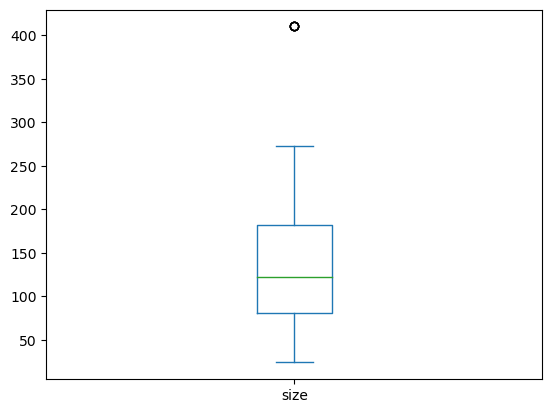

In [16]:
df['size'].plot(kind='box')

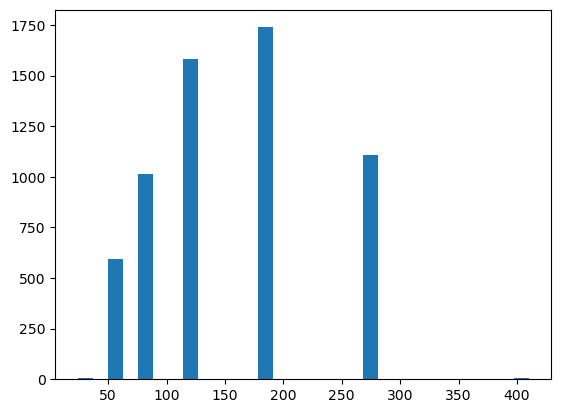

In [17]:
plt.hist(df['size'] , bins=30)
plt.show()

## Note : From the analysis we will resize all the image in 100 x 100 from and remove the image with size less than or equal to 54

In [18]:
df_new = df[df['size'] > 60]

In [19]:
df_new

,path,size
0,./data/crop/male_crop\male_0.png,182
1,./data/crop/male_crop\male_1.png,81
2,./data/crop/male_crop\male_1003.png,81
3,./data/crop/male_crop\male_1005.png,122
4,./data/crop/male_crop\male_1007.png,273
...,...,...
6053,./data/crop/female_crop\female_994.png,182
6054,./data/crop/female_crop\female_995.png,81
6055,./data/crop/female_crop\female_997.png,122
6056,./data/crop/female_crop\female_998.png,182


In [20]:
string = df_new['path'][0]
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [21]:
df['gender'] = df['path'].apply(gender)

In [22]:
df['gender'].value_counts()

gender
female    3590
male      2468
Name: count, dtype: int64

In [23]:
df['gender'].value_counts(normalize=True)

gender
female    0.592605
male      0.407395
Name: proportion, dtype: float64

In [24]:
df_new['size'].min()

81

## Conclusion : 
1. 60% Females are there and 40% Males.
2. All the images size is greater than or equal to 81

### Resizing the image in new dataframe to 100 x 100 array

## Resize Image

In [28]:
def resize_img(path_to_resize):
    try:
        ## Step 1 : Read Image
        img = cv2.imread(path_to_resize)

        ## Step 2 : Convert into grayscale
        gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    
        ## STep 3 : Resize into 100 x 100 array
        size = gray.shape[0]
        if size >= 100:
            gray_re = cv2.resize(gray , (100,100) , cv2.INTER_AREA) ## Shrink
        else:
            gray_re = cv2.resize(gray , (100,100) , cv2.INTER_CUBIC) ## Enlarge

        ## Step 4 : Flatten Image( 1 x 10,000)
        return gray_re.flatten()
    
    except:
        return None

In [29]:
len(resize_img(path[0]))

10000

In [31]:
df_new['gender'] = df_new['path'].apply(gender)
df_new.head()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_3632\4180963935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


,path,size,gender
0,./data/crop/male_crop\male_0.png,182,male
1,./data/crop/male_crop\male_1.png,81,male
2,./data/crop/male_crop\male_1003.png,81,male
3,./data/crop/male_crop\male_1005.png,122,male
4,./data/crop/male_crop\male_1007.png,273,male


In [32]:
df_new.tail()

,path,size,gender
6053,./data/crop/female_crop\female_994.png,182,female
6054,./data/crop/female_crop\female_995.png,81,female
6055,./data/crop/female_crop\female_997.png,122,female
6056,./data/crop/female_crop\female_998.png,182,female
6057,./data/crop/female_crop\female_999.png,182,female


In [33]:
df_new['structure_data'] = df_new['path'].apply(resize_img)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_3632\2814634373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


In [34]:
df_new

,path,size,gender,structure_data
0,./data/crop/male_crop\male_0.png,182,male,"[106, 100, 81, 69, 71, 48, 51, 55, 41, 17, 30,..."
1,./data/crop/male_crop\male_1.png,81,male,"[45, 47, 48, 48, 48, 49, 50, 52, 50, 45, 46, 4..."
2,./data/crop/male_crop\male_1003.png,81,male,"[165, 184, 209, 224, 220, 211, 193, 170, 153, ..."
3,./data/crop/male_crop\male_1005.png,122,male,"[141, 143, 148, 156, 161, 173, 157, 138, 146, ..."
4,./data/crop/male_crop\male_1007.png,273,male,"[180, 115, 41, 103, 23, 25, 36, 35, 25, 31, 38..."
...,...,...,...,...
6053,./data/crop/female_crop\female_994.png,182,female,"[81, 80, 83, 79, 74, 68, 64, 55, 55, 56, 60, 5..."
6054,./data/crop/female_crop\female_995.png,81,female,"[21, 25, 30, 33, 34, 33, 34, 38, 42, 47, 51, 5..."
6055,./data/crop/female_crop\female_997.png,122,female,"[68, 65, 43, 29, 23, 32, 37, 33, 39, 28, 22, 3..."
6056,./data/crop/female_crop\female_998.png,182,female,"[187, 188, 190, 194, 199, 202, 203, 203, 204, ..."


In [36]:
df1 = df_new['structure_data'].apply(pd.Series)
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,106,100,81,69,71,48,51,55,41,17,...,17,18,26,28,31,30,31,29,31,31
1,45,47,48,48,48,49,50,52,50,45,...,137,135,134,135,138,138,137,138,138,135
2,165,184,209,224,220,211,193,170,153,148,...,14,14,14,13,13,14,14,14,14,15
3,141,143,148,156,161,173,157,138,146,121,...,205,203,173,86,72,60,46,59,88,148
4,180,115,41,103,23,25,36,35,25,31,...,112,110,104,112,86,83,116,126,111,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,81,80,83,79,74,68,64,55,55,56,...,115,129,151,148,149,150,153,151,155,148
6054,21,25,30,33,34,33,34,38,42,47,...,32,35,26,12,2,3,4,2,0,1
6055,68,65,43,29,23,32,37,33,39,28,...,65,10,35,33,54,67,43,35,46,46
6056,187,188,190,194,199,202,203,203,204,204,...,72,60,60,48,52,60,46,45,41,49


In [37]:
df2 = pd.concat((df_new['gender'] , df1) , axis=1)
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
1,male,45,47,48,48,48,49,50,52,50,...,137,135,134,135,138,138,137,138,138,135
2,male,165,184,209,224,220,211,193,170,153,...,14,14,14,13,13,14,14,14,14,15
3,male,141,143,148,156,161,173,157,138,146,...,205,203,173,86,72,60,46,59,88,148
4,male,180,115,41,103,23,25,36,35,25,...,112,110,104,112,86,83,116,126,111,113


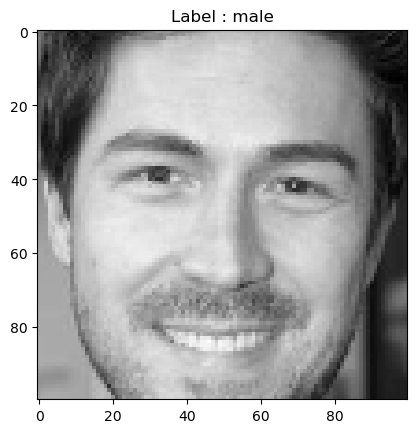

In [38]:
plt.imshow(df2.loc[0][1:].values.reshape(100 , 100).astype('int') , cmap='gray')
plt.title("Label : " + df2.loc[0]['gender'])
plt.show()

In [39]:
import pickle


In [40]:
pickle.dump(df2 , open('./data/dataframe_images_100_100.pickle' , 'wb'))